<a href="https://colab.research.google.com/github/Sreenidhiks8/Mental-Health-Prediction-using-Machine-Learning/blob/main/Copy_of_Copy_of_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
print(df.shape)

(1259, 27)


In [ ]:
# Number of Nan values in each columns
df.isnull().sum(axis = 0)


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
#Drop unnecessary columns
new_df = df.drop(["state","Timestamp","comments"],axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [ ]:
# Null values in each columns in the new dataframe
new_df.isnull().sum(axis = 0)

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
n = new_df.nunique(axis=0)
n

Age                          53
Gender                       49
Country                      48
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

In [ ]:
new_df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
# Genders other than male and female are replaced with "Others" gender
new_df['Gender'] = new_df['Gender'].replace(['Trans-female', 'Cis Female',
        "something kinda male?","Cis Male", 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], 'others')

In [ ]:
# Checking the unique genders are replacing to "others" gender
new_df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'others', 'F', 'Woman', 'f', 'Mal', 'woman', 'Female ', 'Male ',
       'Man'], dtype=object)

In [ ]:
# All types of male genders are converted to M , and for females it is converted to F
new_df['Gender'] = new_df['Gender'].replace([ "male","m","Male-ish","maile","Mal","Male","Man","Male "],"M")
new_df["Gender"] = new_df["Gender"].replace(['Female',"female","Woman","f","woman","Female","Female "],"F")

In [ ]:
# Final checking the unique types of genders
new_df.Gender.unique()

array(['F', 'M', 'others'], dtype=object)

In [ ]:
#Counting the number of each categories
for i in new_df:
  print(new_df[i].value_counts)
  print("Column over")

<bound method IndexOpsMixin.value_counts of 0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64>
Column over
<bound method IndexOpsMixin.value_counts of 0       F
1       M
2       M
3       M
4       M
       ..
1254    M
1255    M
1256    M
1257    F
1258    M
Name: Gender, Length: 1259, dtype: object>
Column over
<bound method IndexOpsMixin.value_counts of 0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
             ...      
1254    United Kingdom
1255     United States
1256     United States
1257     United States
1258     United States
Name: Country, Length: 1259, dtype: object>
Column over
<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1254     No
1255     No
1256     No
1257     No
1258     No
Name: self_employed, Length: 1259, dtype: obje

In [ ]:
new_df.columns


Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding on col1, col2 columns
new_df = new_df[['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']] = df[['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']].apply(LabelEncoder().fit_transform)


In [ ]:
new_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,25,10,45,2,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,32,16,45,2,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,20,20,7,2,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,19,20,44,2,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,19,20,45,2,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


In [ ]:
# filling the null values in the columns with mean values
new_df[['work_interfere', 'self_employed']] = new_df[['work_interfere', 'self_employed']].fillna(df[['work_interfere', 'self_employed']].mean())

<ipython-input-18-055123fc3089>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df[['work_interfere', 'self_employed']] = new_df[['work_interfere', 'self_employed']].fillna(df[['work_interfere', 'self_employed']].mean())


In [ ]:
# Null values in each columns in the new dataframe
new_df.isnull().sum(axis = 0)

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
new_df.shape

(1259, 24)

In [ ]:
X=new_df.drop(['obs_consequence'],axis=1).values
Y=new_df['obs_consequence'].values

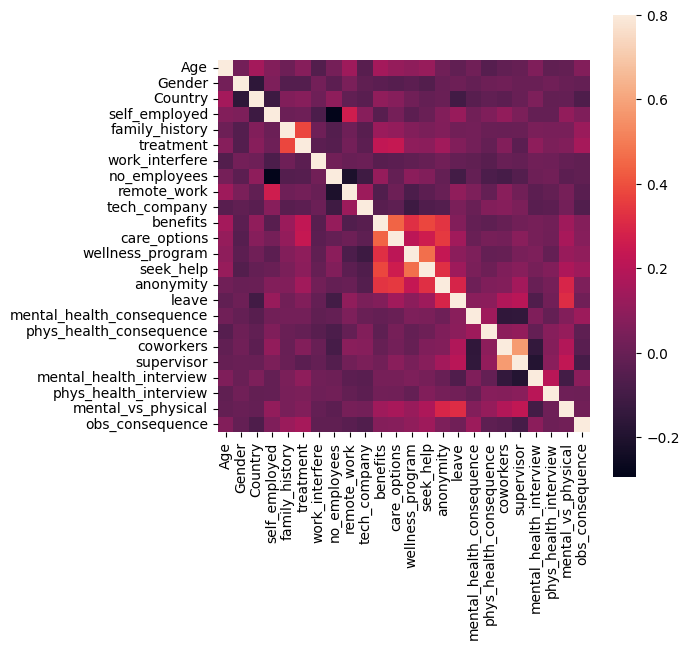

In [ ]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmax=0.8, square=True);
plt.show()

<ipython-input-23-2c80098c287b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["Age"], bins=24, color="purple")


Text(0.5, 0, 'Age')

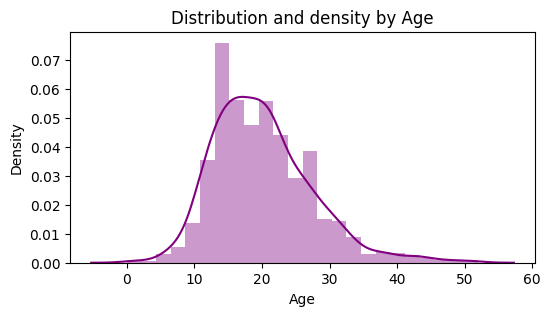

In [ ]:
# Distribution and density by Age
#can also use displot/histplot
plt.figure(figsize=(6,3))
sns.distplot(new_df["Age"], bins=24, color="purple")
plt.title("Distribution and density by Age")
plt.xlabel("Age")

Inference: From this we conclude that density of mental illness is higher in the age group of 15-30 years.

In [ ]:
#Encoding data
from sklearn import preprocessing
labelDict = {}
for feature in new_df:
    le = preprocessing.LabelEncoder()
    le.fit(new_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    new_df[feature] = le.transform(new_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

In [ ]:
new_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,25,10,45,2,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,32,16,45,2,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,20,20,7,2,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,19,20,44,2,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,19,20,45,2,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


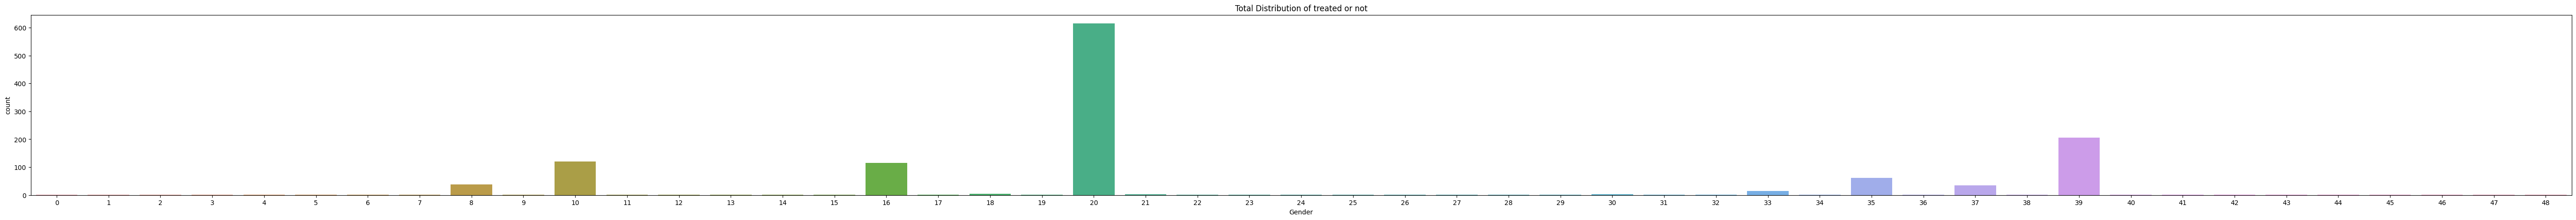

In [ ]:
#To analyze which gender receives maximum treatment for mental health issues.
plt.figure(figsize=(70,5))
labels = labelDict['label_Gender']
j = sns.countplot(x="Gender", data=new_df)
j.set_xticklabels(labels)
plt.title('Total Distribution of treated or not')
plt.show()

Inference: We can notice that more males are being treated for mental health conditions than females or other genders.

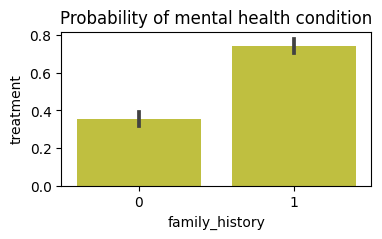

In [ ]:
#relation between family history of mental illness and its treatment
plt.figure(figsize=(4,2))
plt.title("Probability of mental health condition")
sns.barplot(x="family_history",y="treatment",data= new_df,color="yellow",saturation=0.5)
plt.show()
# 0= No family history of mental illness
# 1= Family history of mental illness present

Inference: People who have had a family history of mental illness are more likely to be affected by mental health issues(Approximately 80%).
Note: 0 denotes no family history of mental illness and 1 denotes its presence

In [ ]:

#printing pie chart
#work_list= df['work_interfere'].tolist()
#work_list2=[1,2,3,4,5]
#print(work_list)
#keys = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']
#palette_color = sns.color_palette('bright')
#plt.pie(work_list2,labels=keys,colors=palette_color)
#plt.show()

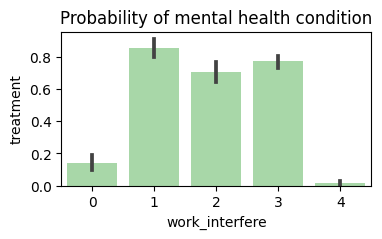

In [ ]:
plt.figure(figsize=(4,2))
plt.title("Probability of mental health condition")
sns.barplot(x="work_interfere",y="treatment",data= new_df,color="lightgreen",saturation=0.5)
plt.show()

#df.work_interfere.unique()

Inference: People who are overly burdened by work or the ones who are rarely having work interference and the ones bothered by work at times are mostly prey of mental illness.   
Note:   
0--> Don't know   
1--> Often Work interfere      
2--> Rarely work interfere    
3--> Sometimes    
4--> Never

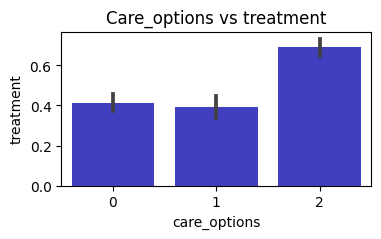

In [ ]:
plt.figure(figsize=(4,2))
plt.title("Care_options vs treatment")
sns.barplot(x="care_options",y="treatment",data= new_df,color="blue",saturation=0.5)
plt.show()
#df.work_interfere.unique()

Inference: People who have care options and can avail them are more likely to receive treatment as compared to people who don't have or are not sure about treatment options.

Note:    
      0--> No care options    
      1--> Not sure    
      2--> Care options available

<Axes: title={'center': 'Based on remote work'}, xlabel='remote_work', ylabel='count'>

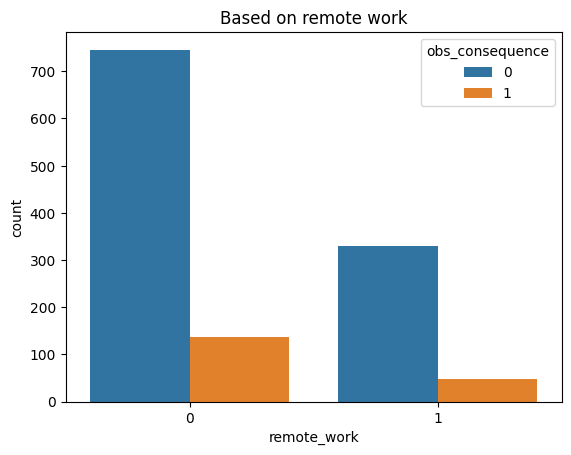

In [ ]:
plt.title("Based on remote work")
sns.countplot(x='remote_work',hue='obs_consequence',data=new_df)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=40,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [ ]:
res=clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print(confusion_matrix(res,y_test))
print("Acuuracy score: {:.4f} %".format(accuracy_score(res,y_test)*100))
print("f1 score: {:.4f} % ".format(f1_score(res,y_test,average='weighted')*100))

[[206  40]
 [  3   3]]
Acuuracy score: 82.9365 %
f1 score: 88.6851 % 


The Model has 88.68% f1 score which shows that the model has good predictability towards minority class as well

Applying cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.29 %
Standard Deviation: 1.39 %


Performing grid search to find the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[10,25,50,70,100]}]
grid_search=GridSearchCV(estimator=clf,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.39 %
Best Parameters: {'n_estimators': 25}


XGboost model

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
res2=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print(confusion_matrix(res2,y_test))
print("Acuuracy score: {:.4f} %".format(accuracy_score(res2,y_test)*100))
print("f1 score: {:.4f} % ".format(f1_score(res2,y_test,average='weighted')*100))


[[200  37]
 [  9   6]]
Acuuracy score: 81.7460 %
f1 score: 85.5792 % 


Cross validating xgboost model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.30 %
Standard Deviation: 1.68 %
